In [1]:
# 1. Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0c1ba86cb8f77380ad856565e1a6aae2


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# List of city data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list
for i, city in enumerate(cities):
   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 1
       time.sleep(60)
   # Create endpoint URL with each city
   city_url = url + "&q=" + city.replace(" ","+")
   # Log the url, record, and set numbers
   print(f"Processing Record {record_count} of Set {set_count} | {city}")
   # Add 1 to the record count
   record_count += 1
   # Run an API request for each of the cities
   try:
       city_weather = requests.get(city_url).json()
       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_weather_description = city_weather["weather"][0]["description"]
           # Append the City information into city_data list
          # Convert the date to ISO standard.
       city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
       city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Date": city_date,
                         "Max Temp": city_max_temp,
                         "Current Description": city_weather_description,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country})
   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | bal-os
Processing Record 12 of Set 1 | sayyan
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | norsup
Processing Record 15 of Set 1 | manchester
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | yanam
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | orsha
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | fortuna
Processing Record 24 

Processing Record 40 of Set 4 | sangar
Processing Record 41 of Set 4 | mao
Processing Record 42 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 43 of Set 4 | dawei
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | hoima
Processing Record 50 of Set 4 | aleksandrovka
Processing Record 1 of Set 5 | karaul
City not found. Skipping...
Processing Record 2 of Set 5 | chicama
Processing Record 3 of Set 5 | kishi
Processing Record 4 of Set 5 | victoria
Processing Record 5 of Set 5 | lavrentiya
Processing Record 6 of Set 5 | kandrian
Processing Record 7 of Set 5 | elektrenai
Processing Record 8 of Set 5 | thohoyandou
Processing Record 9 of Set 5 | areosa
Processing Record 10 of Set 5 | serdobsk
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 5 | hambantota
Processing

Processing Record 33 of Set 8 | tungkang
City not found. Skipping...
Processing Record 34 of Set 8 | ixtapa
Processing Record 35 of Set 8 | sivaki
Processing Record 36 of Set 8 | lashio
Processing Record 37 of Set 8 | petropavlivka
Processing Record 38 of Set 8 | evensk
Processing Record 39 of Set 8 | emerald
Processing Record 40 of Set 8 | barcelos
Processing Record 41 of Set 8 | bayonet point
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | ghatanji
Processing Record 44 of Set 8 | piracanjuba
Processing Record 45 of Set 8 | de aar
Processing Record 46 of Set 8 | ostrovnoy
Processing Record 47 of Set 8 | arlit
Processing Record 48 of Set 8 | addis zemen
City not found. Skipping...
Processing Record 49 of Set 8 | camana
Processing Record 50 of Set 8 | daliang
Processing Record 1 of Set 9 | inirida
Processing Record 2 of Set 9 | santa fe
Processing Record 3 of Set 9 | zurrieq
Processing Record 4 of Set 9 | ho chi minh city
Processing Record 5 of Set 9 | warqla
City

Processing Record 17 of Set 12 | saltillo
Processing Record 18 of Set 12 | ponnani
Processing Record 19 of Set 12 | guiren
Processing Record 20 of Set 12 | ongandjera
Processing Record 21 of Set 12 | moree
Processing Record 22 of Set 12 | san pedro
Processing Record 23 of Set 12 | upata
Processing Record 24 of Set 12 | westpunt
City not found. Skipping...
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | crowley
Processing Record 27 of Set 12 | de-kastri
Processing Record 28 of Set 12 | voh
Processing Record 29 of Set 12 | zhangye
Processing Record 30 of Set 12 | riyadh
Processing Record 31 of Set 12 | kinna
Processing Record 32 of Set 12 | kedougou
Processing Record 33 of Set 12 | kumluca
Processing Record 34 of Set 12 | cuamba
Processing Record 35 of Set 12 | johi
Processing Record 36 of Set 12 | kaili
Processing Record 37 of Set 12 | comodoro rivadavia
Processing Record 38 of Set 12 | syracuse
Processing Record 39 of Set 12 | gangapur
Processing Record 40

In [7]:
len(city_data)

554

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Date,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Thompson,55.7435,-97.8558,2021-11-26 22:38:02,14.16,light snow,92,90,3.44,CA
1,Pevek,69.7008,170.3133,2021-11-26 22:38:02,-26.99,scattered clouds,99,34,5.77,RU
2,Hermanus,-34.4187,19.2345,2021-11-26 22:38:02,64.15,light rain,92,100,7.02,ZA
3,Bluff,-46.6000,168.3333,2021-11-26 22:38:03,50.31,overcast clouds,59,100,5.50,NZ
4,Ushuaia,-54.8000,-68.3000,2021-11-26 22:35:37,49.66,broken clouds,46,75,21.85,AR
...,...,...,...,...,...,...,...,...,...,...
549,Asau,46.4333,26.4000,2021-11-26 22:51:27,41.92,overcast clouds,93,100,5.97,RO
550,Cururupu,-1.8283,-44.8683,2021-11-26 22:51:28,76.12,broken clouds,89,83,3.44,BR
551,Shimoda,34.6667,138.9500,2021-11-26 22:51:28,53.17,clear sky,53,0,18.32,JP
552,Quatre Cocos,-20.2078,57.7625,2021-11-26 22:51:28,73.51,clear sky,70,0,4.81,MU


In [13]:
city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-11-26 22:38:02,55.7435,-97.8558,14.16,92,90,3.44
1,Pevek,RU,2021-11-26 22:38:02,69.7008,170.3133,-26.99,99,34,5.77
2,Hermanus,ZA,2021-11-26 22:38:02,-34.4187,19.2345,64.15,92,100,7.02
3,Bluff,NZ,2021-11-26 22:38:03,-46.6000,168.3333,50.31,59,100,5.50
4,Ushuaia,AR,2021-11-26 22:35:37,-54.8000,-68.3000,49.66,46,75,21.85
...,...,...,...,...,...,...,...,...,...
549,Asau,RO,2021-11-26 22:51:27,46.4333,26.4000,41.92,93,100,5.97
550,Cururupu,BR,2021-11-26 22:51:28,-1.8283,-44.8683,76.12,89,83,3.44
551,Shimoda,JP,2021-11-26 22:51:28,34.6667,138.9500,53.17,53,0,18.32
552,Quatre Cocos,MU,2021-11-26 22:51:28,-20.2078,57.7625,73.51,70,0,4.81


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

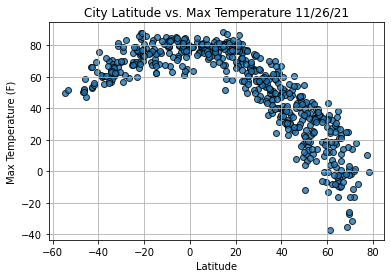

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

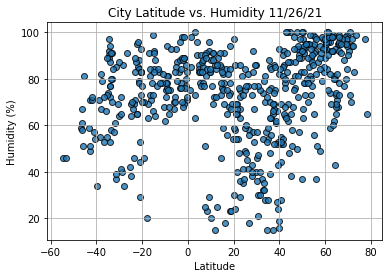

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

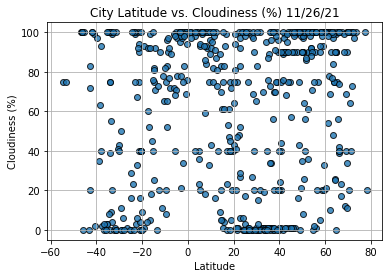

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

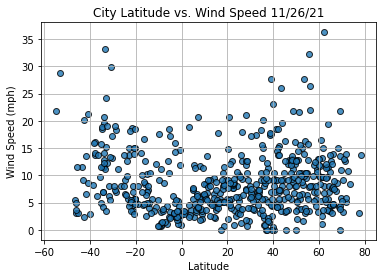

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()